In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d
#importing libraries

In [2]:
df=pd.read_csv("bank.csv")
#importing the dataset

In [3]:
df.head(20) #top 20 rows of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
df.describe() 

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
df.info() #info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.drop(['pdays','previous'],axis=1,inplace=True) #dropping the unused columns 

In [7]:
df.shape

(4521, 15)

In [8]:
df_cat=df.select_dtypes(include=['object'])

In [9]:
df_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [10]:
df['default']=df['default'].apply(lambda x:1 if x=='yes' else 0) #applying function of yes or no for the columns

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,unemployed,married,primary,0,1787,no,no,cellular,19,oct,79,1,unknown,no
1,33,services,married,secondary,0,4789,yes,yes,cellular,11,may,220,1,failure,no
2,35,management,single,tertiary,0,1350,yes,no,cellular,16,apr,185,1,failure,no
3,30,management,married,tertiary,0,1476,yes,yes,unknown,3,jun,199,4,unknown,no
4,59,blue-collar,married,secondary,0,0,yes,no,unknown,5,may,226,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,yes,no,cellular,30,jul,329,5,unknown,no
4517,57,self-employed,married,tertiary,1,-3313,yes,yes,unknown,9,may,153,1,unknown,no
4518,57,technician,married,secondary,0,295,no,no,cellular,19,aug,151,11,unknown,no
4519,28,blue-collar,married,secondary,0,1137,no,no,cellular,6,feb,129,4,other,no


In [12]:
df['housing']=df['housing'].apply(lambda x:1 if x=='yes' else 0)

In [13]:
df['loan']=df['loan'].apply(lambda x:1 if x=='yes' else 0)

In [14]:
df['y']=df['y'].apply(lambda x:1 if x=='yes' else 0)

In [15]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,other,0


In [16]:
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [17]:
df['job'].astype('category').value_counts() #setting the column of job as category type and counting the values as well for all columns and same for below as well

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [18]:
df['marital'].astype('category').value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [19]:
df['education'].astype('category').value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [20]:
df['contact'].astype('category').value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [21]:
df['poutcome'].astype('category').value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [22]:
df.drop('poutcome',axis=1,inplace=True)

In [23]:
dumm1=pd.get_dummies(df['job'])

In [24]:
df=pd.concat([df,dumm1],axis=1) #combining the columns

In [25]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,...,0,0,0,0,0,0,0,0,1,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,...,0,0,0,0,0,1,0,0,0,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,...,0,0,1,0,0,0,0,0,0,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,...,0,0,1,0,0,0,0,0,0,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,...,0,0,0,0,0,1,0,0,0,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,...,0,0,0,0,1,0,0,0,0,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,...,0,0,0,0,0,0,0,1,0,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.drop('job',axis=1,inplace=True) #dropping the job column

In [27]:
df

,age,marital,education,default,balance,housing,loan,contact,day,month,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,30,married,primary,0,1787,0,0,cellular,19,oct,...,0,0,0,0,0,0,0,0,1,0
1,33,married,secondary,0,4789,1,1,cellular,11,may,...,0,0,0,0,0,1,0,0,0,0
2,35,single,tertiary,0,1350,1,0,cellular,16,apr,...,0,0,1,0,0,0,0,0,0,0
3,30,married,tertiary,0,1476,1,1,unknown,3,jun,...,0,0,1,0,0,0,0,0,0,0
4,59,married,secondary,0,0,1,0,unknown,5,may,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,married,secondary,0,-333,1,0,cellular,30,jul,...,0,0,0,0,0,1,0,0,0,0
4517,57,married,tertiary,1,-3313,1,1,unknown,9,may,...,0,0,0,0,1,0,0,0,0,0
4518,57,married,secondary,0,295,0,0,cellular,19,aug,...,0,0,0,0,0,0,0,1,0,0
4519,28,married,secondary,0,1137,0,0,cellular,6,feb,...,0,0,0,0,0,0,0,0,0,0


In [28]:
dumm2=pd.get_dummies(df['marital'])
df=pd.concat([df,dumm2],axis=1)
df.drop('marital',axis=1,inplace=True) #creating the dummy variables for this and below as well

In [29]:
dumm3=pd.get_dummies(df['education'])
df=pd.concat([df,dumm3],axis=1)
df.drop('education',axis=1,inplace=True)

In [30]:
dumm4=pd.get_dummies(df['contact'])
df=pd.concat([df,dumm4],axis=1)
df.drop('contact',axis=1,inplace=True)

In [31]:
dumm5=pd.get_dummies(df['month'])
df=pd.concat([df,dumm5],axis=1)
df.drop('month',axis=1,inplace=True)

In [32]:
#dumm6=pd.get_dummies(df['poutcome'])
#df=pd.concat([df,dumm6],axis=1)
#df.drop('poutcome',axis=1,inplace=True)

In [33]:
df

,age,default,balance,housing,loan,day,duration,campaign,y,admin.,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,30,0,1787,0,0,19,79,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,11,220,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,0,0,...,0,0,0,0,1,0,0,0,0,0
4,59,0,0,1,0,5,226,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,30,329,5,0,0,...,0,0,0,1,0,0,0,0,0,0
4517,57,1,-3313,1,1,9,153,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4518,57,0,295,0,0,19,151,11,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,28,0,1137,0,0,6,129,4,0,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
round(100*(df.isnull().sum()/len(df.index)), 2)

age              0.0
default          0.0
balance          0.0
housing          0.0
loan             0.0
day              0.0
duration         0.0
campaign         0.0
y                0.0
admin.           0.0
blue-collar      0.0
entrepreneur     0.0
housemaid        0.0
management       0.0
retired          0.0
self-employed    0.0
services         0.0
student          0.0
technician       0.0
unemployed       0.0
unknown          0.0
divorced         0.0
married          0.0
single           0.0
primary          0.0
secondary        0.0
tertiary         0.0
unknown          0.0
cellular         0.0
telephone        0.0
unknown          0.0
apr              0.0
aug              0.0
dec              0.0
feb              0.0
jan              0.0
jul              0.0
jun              0.0
mar              0.0
may              0.0
nov              0.0
oct              0.0
sep              0.0
dtype: float64

In [35]:
X=df.drop(['y'],axis=1)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            4521 non-null   int64
 1   default        4521 non-null   int64
 2   balance        4521 non-null   int64
 3   housing        4521 non-null   int64
 4   loan           4521 non-null   int64
 5   day            4521 non-null   int64
 6   duration       4521 non-null   int64
 7   campaign       4521 non-null   int64
 8   admin.         4521 non-null   uint8
 9   blue-collar    4521 non-null   uint8
 10  entrepreneur   4521 non-null   uint8
 11  housemaid      4521 non-null   uint8
 12  management     4521 non-null   uint8
 13  retired        4521 non-null   uint8
 14  self-employed  4521 non-null   uint8
 15  services       4521 non-null   uint8
 16  student        4521 non-null   uint8
 17  technician     4521 non-null   uint8
 18  unemployed     4521 non-null   uint8
 19  unknow

In [37]:
y=df['y']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
X_train.head()

,age,default,balance,housing,loan,day,duration,campaign,admin.,blue-collar,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
2085,33,0,-77,1,0,28,151,3,0,1,...,0,0,0,1,0,0,0,0,0,0
1239,28,0,4229,1,1,5,205,2,0,1,...,0,0,0,0,0,0,1,0,0,0
130,41,0,168,1,0,18,187,3,0,1,...,0,0,0,0,0,0,0,1,0,0
2345,26,0,512,1,1,30,206,5,0,0,...,0,0,1,0,0,0,0,0,0,0
1296,58,0,2,0,0,16,684,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
from sklearn.preprocessing import StandardScaler #importing the library

In [42]:
scaler = StandardScaler()

X_train[['age','balance','day','duration']] = scaler.fit_transform(X_train[['age','balance','day','duration']])

X_train.head(10)

C:\Users\sai chand\anaconda5\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sai chand\anaconda5\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,default,balance,housing,loan,day,duration,campaign,admin.,blue-collar,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
2085,-0.781696,0,-0.490292,1,0,1.447256,-0.427557,3,0,1,...,0,0,0,1,0,0,0,0,0,0
1239,-1.259091,0,0.905722,1,1,-1.323076,-0.225129,2,0,1,...,0,0,0,0,0,0,1,0,0,0
130,-0.017865,0,-0.410863,1,0,0.242764,-0.292605,3,0,1,...,0,0,0,0,0,0,0,1,0,0
2345,-1.450049,0,-0.299337,1,1,1.688155,-0.221381,5,0,0,...,0,0,1,0,0,0,0,0,0,0
1296,1.605278,0,-0.464680,0,0,0.001865,1.570479,1,0,0,...,0,0,0,0,1,0,0,0,0,0
318,-0.590738,0,0.497876,0,0,-1.443526,0.614570,4,0,0,...,0,0,0,0,0,0,1,0,0,0
2461,-0.972654,0,3.226036,1,0,0.483662,0.340918,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1764,-1.163612,0,0.180482,0,0,-0.961729,-0.236375,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2636,0.555009,0,1.125207,1,0,-0.239033,0.464624,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2578,0.077614,0,-0.465329,0,0,1.567706,-0.686214,12,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
a1=(sum(df['y'])/len(df['y'].index))*100
a1

11.523999115239992

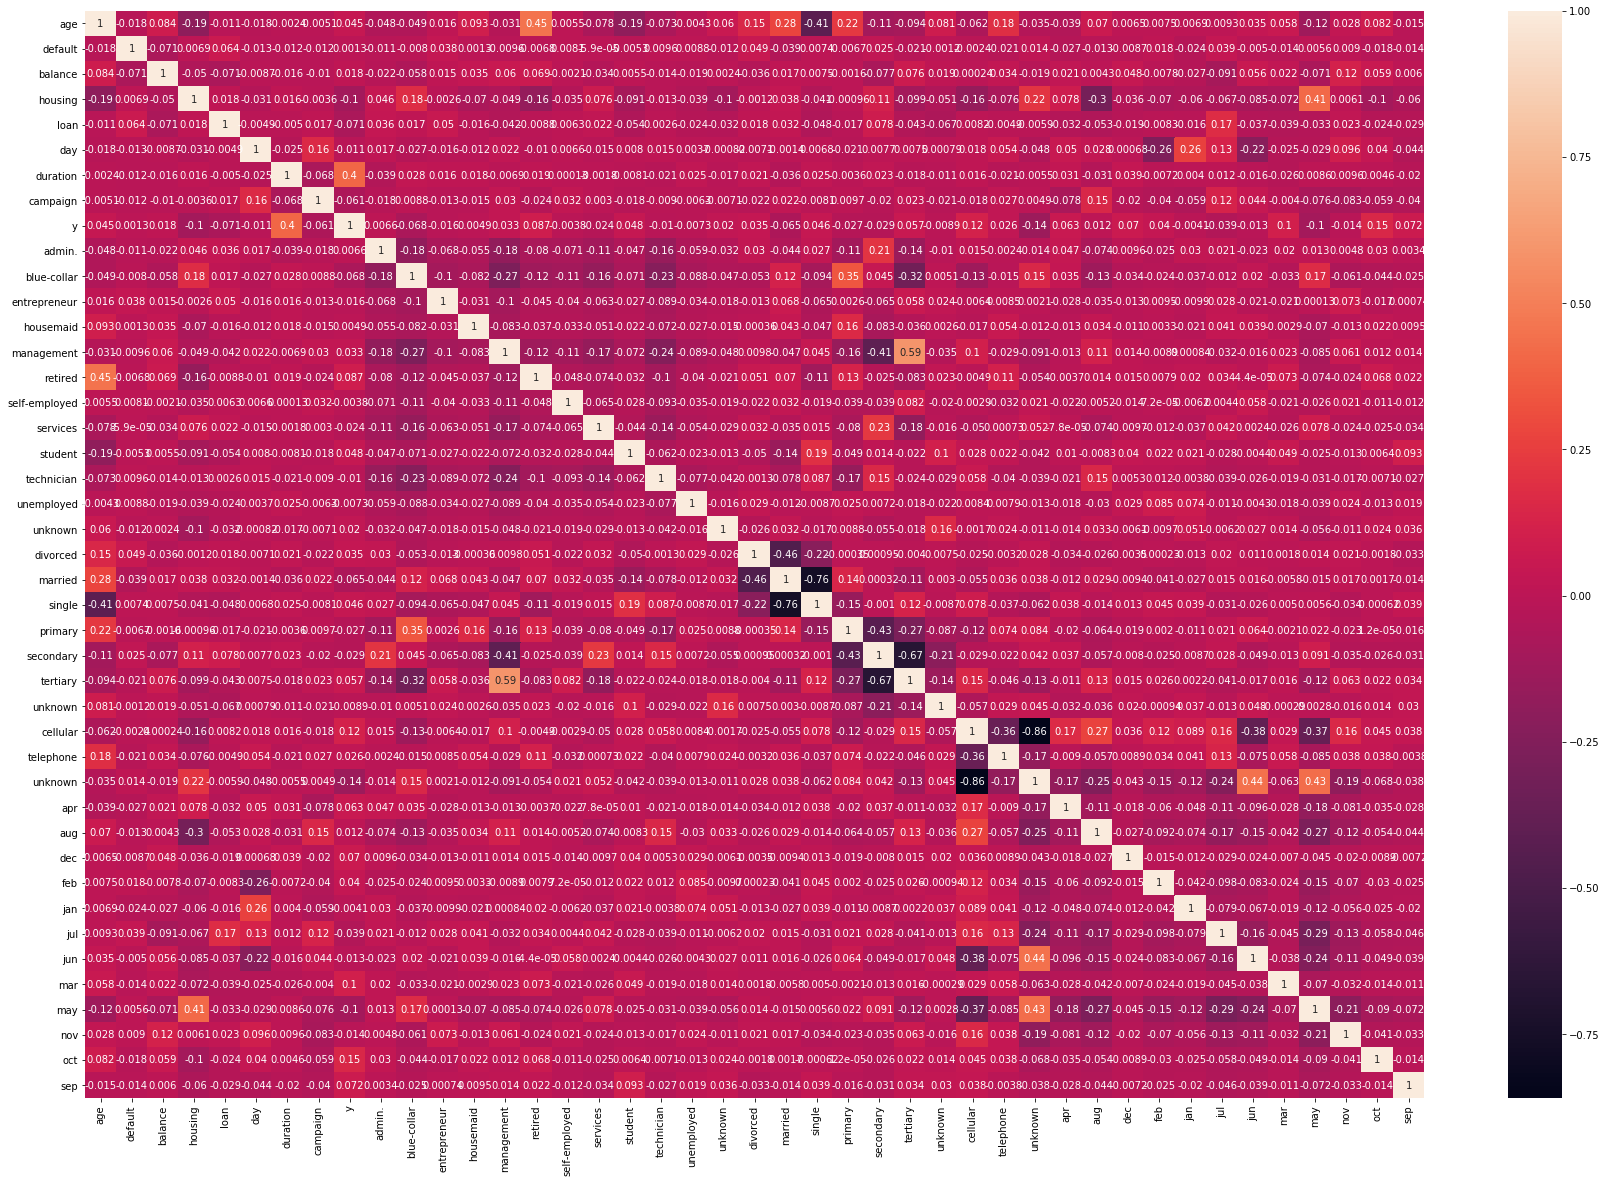

In [44]:
plt.figure(figsize = (30,20))        
sns.heatmap(df.corr(),annot = True)
plt.show() #heatmap

In [45]:
df.corr()

,age,default,balance,housing,loan,day,duration,campaign,y,admin.,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
age,1.000000,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,0.045092,-0.048385,...,0.006492,0.007476,0.006915,0.009329,0.034671,0.057909,-0.119784,0.027659,0.081766,-0.015074
default,-0.017885,1.000000,-0.070886,0.006881,0.063994,-0.013261,-0.011615,-0.012348,0.001303,-0.011389,...,-0.008716,0.018059,-0.024055,0.038542,-0.004950,-0.013687,0.005580,0.008962,-0.017550,-0.014105
balance,0.083820,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,-0.015950,-0.009976,0.017905,-0.022386,...,0.047503,-0.007825,-0.027283,-0.090516,0.056023,0.021805,-0.070809,0.120363,0.058694,0.005975
housing,-0.193888,0.006881,-0.050227,1.000000,0.018451,-0.031291,0.015740,-0.003574,-0.104683,0.045632,...,-0.035779,-0.069514,-0.059620,-0.067143,-0.085332,-0.072133,0.412996,0.006073,-0.102506,-0.060410
loan,-0.011250,0.063994,-0.071349,0.018451,1.000000,-0.004879,-0.004997,0.017120,-0.070517,0.035866,...,-0.019051,-0.008338,-0.015962,0.172880,-0.036580,-0.038525,-0.032816,0.023113,-0.024372,-0.028523
day,-0.017853,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,-0.024629,0.160706,-0.011244,0.017052,...,0.000685,-0.258078,0.263857,0.125002,-0.217517,-0.024570,-0.028992,0.095832,0.040235,-0.043666
duration,-0.002367,-0.011615,-0.015950,0.015740,-0.004997,-0.024629,1.000000,-0.068382,0.401118,-0.038763,...,0.039237,-0.007227,0.003950,0.011994,-0.016196,-0.026212,0.008639,0.009572,0.004566,-0.020023
campaign,-0.005148,-0.012348,-0.009976,-0.003574,0.017120,0.160706,-0.068382,1.000000,-0.061147,-0.017895,...,-0.020229,-0.039565,-0.058947,0.124571,0.044317,-0.004045,-0.076263,-0.083385,-0.058536,-0.040207
y,0.045092,0.001303,0.017905,-0.104683,-0.070517,-0.011244,0.401118,-0.061147,1.000000,0.006568,...,0.069884,0.039805,-0.004109,-0.038851,-0.013323,0.102716,-0.102077,-0.014397,0.145964,0.071510
admin.,-0.048385,-0.011389,-0.022386,0.045632,0.035866,0.017052,-0.038763,-0.017895,0.006568,1.000000,...,0.009597,-0.024873,0.029721,0.020521,-0.022660,0.019587,0.012749,0.004801,0.030236,0.003387


In [46]:
X_train.info() #info of the trained data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164 entries, 2085 to 3927
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3164 non-null   float64
 1   default        3164 non-null   int64  
 2   balance        3164 non-null   float64
 3   housing        3164 non-null   int64  
 4   loan           3164 non-null   int64  
 5   day            3164 non-null   float64
 6   duration       3164 non-null   float64
 7   campaign       3164 non-null   int64  
 8   admin.         3164 non-null   uint8  
 9   blue-collar    3164 non-null   uint8  
 10  entrepreneur   3164 non-null   uint8  
 11  housemaid      3164 non-null   uint8  
 12  management     3164 non-null   uint8  
 13  retired        3164 non-null   uint8  
 14  self-employed  3164 non-null   uint8  
 15  services       3164 non-null   uint8  
 16  student        3164 non-null   uint8  
 17  technician     3164 non-null   uint8  
 18  unemp

In [47]:
X_test = X_test.drop(['management','cellular','secondary','married'], axis=1)
X_train = X_train.drop(['management','cellular','secondary','married'],axis=1)

In [48]:
X_train.head()

,age,default,balance,housing,loan,day,duration,campaign,admin.,blue-collar,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
2085,-0.781696,0,-0.490292,1,0,1.447256,-0.427557,3,0,1,...,0,0,0,1,0,0,0,0,0,0
1239,-1.259091,0,0.905722,1,1,-1.323076,-0.225129,2,0,1,...,0,0,0,0,0,0,1,0,0,0
130,-0.017865,0,-0.410863,1,0,0.242764,-0.292605,3,0,1,...,0,0,0,0,0,0,0,1,0,0
2345,-1.450049,0,-0.299337,1,1,1.688155,-0.221381,5,0,0,...,0,0,1,0,0,0,0,0,0,0
1296,1.605278,0,-0.464680,0,0,0.001865,1.570479,1,0,0,...,0,0,0,0,1,0,0,0,0,0


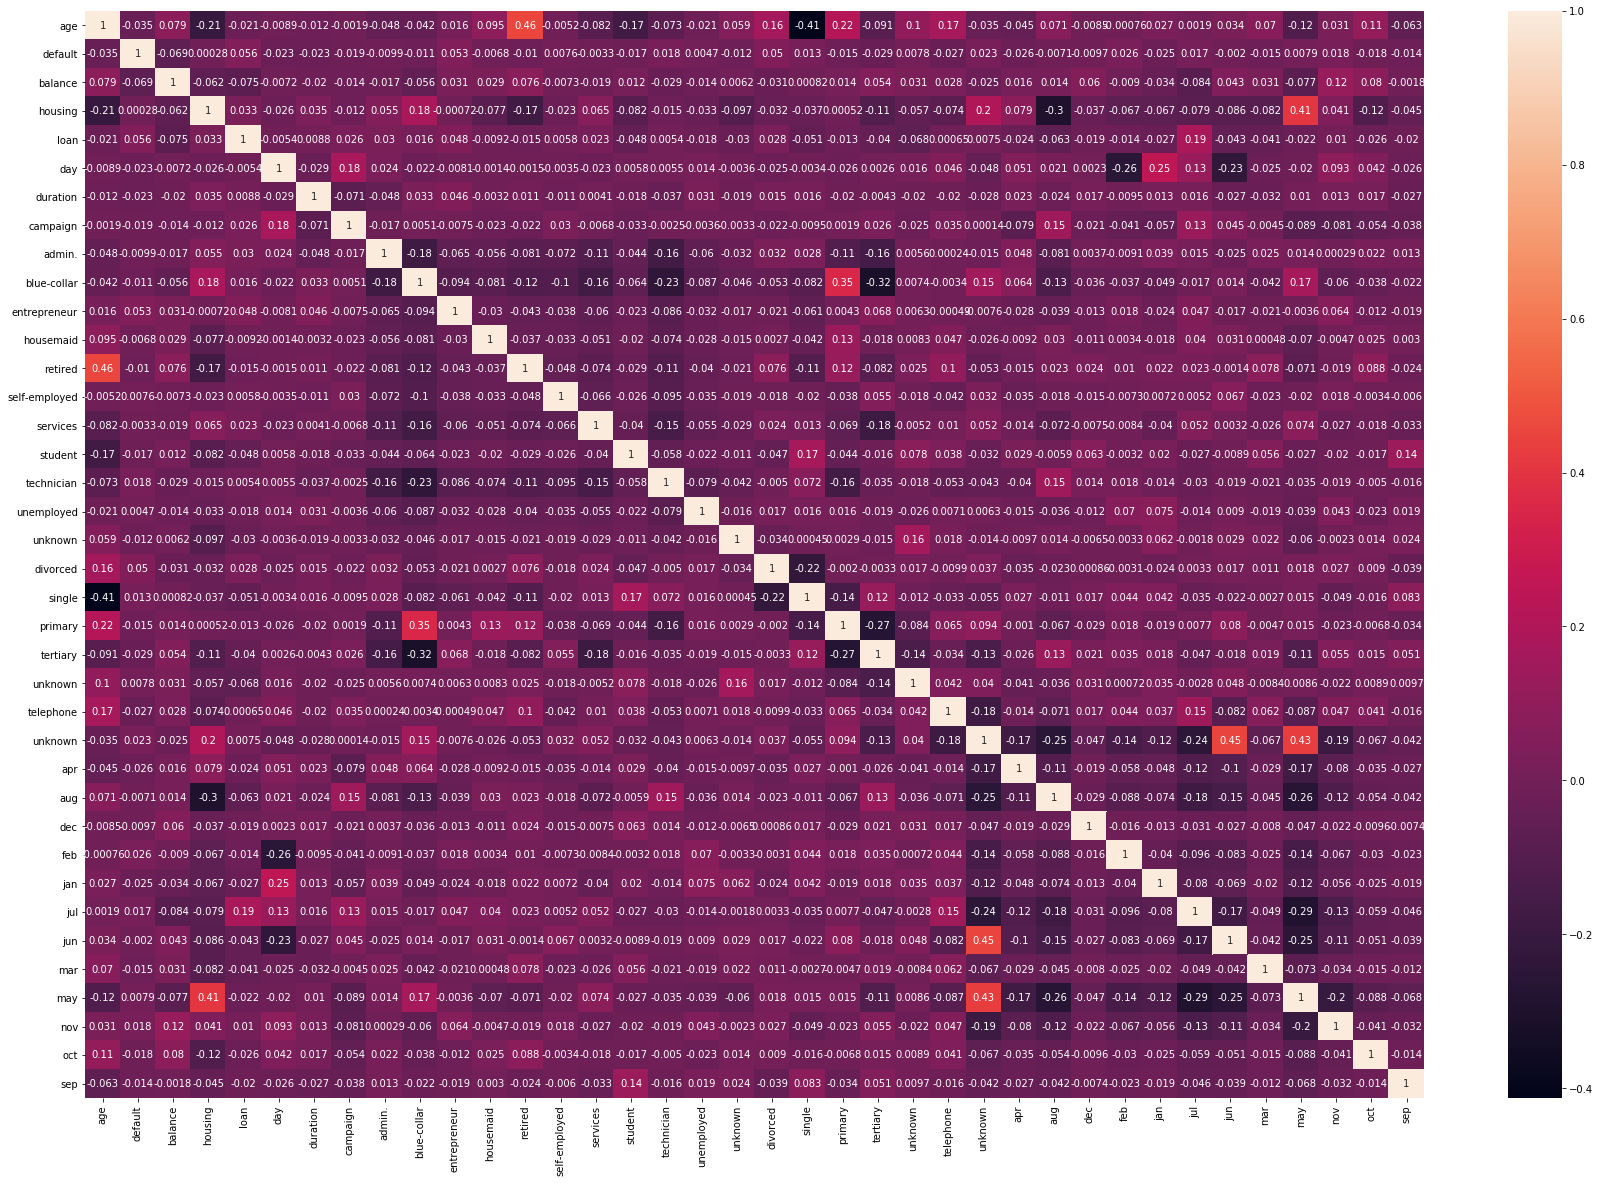

In [49]:
plt.figure(figsize = (30,20))
sns.heatmap(X_train.corr(),annot = True)
plt.show() #heatmap

In [50]:
import statsmodels.api as sm #importing the library

In [51]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3126
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -826.23
Date:                Sun, 20 Sep 2020   Deviance:                       1652.5
Time:                        10:30:32   Pearson chi2:                 4.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0693      0.231     -4.629      0.000      -1.522      -0.617
age              -0.0222      0.085     -0.262      0.793      -0.188       0.144
default           0.6306      0.461      1.367      0.172      -0.274       1.535
balance          -0.0302      0.058     -0.517      0.605      -0.145       0.084
housing          -0.4425      0.157     -2.822      0.005      -0.750      -0.135
loan             -0.7442      0.225     -3.307      0.001      -1.185      -0.303
day               0.0310      0.077      0.402      0.688      -0.120       0.182
duration          1.0731      0.063     16.968      0.000       0.949       1.197
campaign         -0.0719      0.033     -2.157      0.031      -0.137      -0.007
admin.            0.3496      0.265      1.321      0.186      -0.169       0.868
blue-collar      -0.2146      0.269     -0.798      0.425      -0.741       0.312
entrepreneur     -0.7426      0.455     -1.632      0.103      -1.634       0.149
housemaid        -0.0882      0.436     -0.202      0.840      -0.942       0.766
retired           0.7542      0.332      2.272      0.023       0.104       1.405
self-employed    -0.4024      0.397     -1.014      0.311      -1.181       0.376
services          0.1549      0.299      0.517      0.605      -0.432       0.742
student          -0.0516      0.471     -0.110      0.913      -0.974       0.871
technician       -0.1516      0.231     -0.656      0.512      -0.604       0.301
unemployed       -0.8919      0.492     -1.812      0.070      -1.857       0.073
unknown           0.7959      0.615      1.295      0.195      -0.409       2.001
divorced          0.3962      0.195      2.027      0.043       0.013       0.779
single            0.0820      0.167      0.490      0.624      -0.246       0.410
primary          -0.3493      0.245     -1.428      0.153      -0.829       0.130
tertiary          0.2385      0.189      1.259      0.208      -0.133       0.610
unknown          -0.4415      0.367     -1.203      0.229      -1.161       0.278
telephone        -0.3301      0.278     -1.190      0.234      -0.874       0.214
unknown          -1.6864      0.250     -6.754      0.000      -2.176      -1.197
apr               0.0160      0.201      0.080      0.936      -0.377       0.409
aug              -0.8492      0.187     -4.548      0.000      -1.215      -0.483
dec               0.6664      0.531      1.255      0.210      -0.375       1.708
feb              -0.2131      0.257     -0.830      0.407      -0.716       0.290
jan              -1.0651      0.361     -2.952      0.003      -1.772      -0.358
jul              -1.3362      0.207     -6.470      0.000      -1.741      -0.931
jun               0.3230      0.248      1.304      0.192      -0.163       0.809
mar               1.0744      0.335      3.207   

In [52]:
from sklearn.linear_model import LogisticRegression #importing library of logistric regression
logreg = LogisticRegression()

In [53]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 23),
 ('default', False, 4),
 ('balance', False, 21),
 ('housing', False, 2),
 ('loan', True, 1),
 ('day', False, 22),
 ('duration', True, 1),
 ('campaign', False, 20),
 ('admin.', False, 8),
 ('blue-collar', False, 15),
 ('entrepreneur', True, 1),
 ('housemaid', False, 19),
 ('retired', True, 1),
 ('self-employed', False, 11),
 ('services', False, 13),
 ('student', False, 24),
 ('technician', False, 17),
 ('unemployed', True, 1),
 ('unknown', False, 5),
 ('divorced', False, 7),
 ('single', False, 18),
 ('primary', True, 1),
 ('tertiary', False, 12),
 ('unknown', False, 6),
 ('telephone', False, 9),
 ('unknown', True, 1),
 ('apr', False, 14),
 ('aug', True, 1),
 ('dec', False, 3),
 ('feb', False, 16),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 10),
 ('mar', True, 1),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', True, 1),
 ('sep', True, 1)]

In [55]:
col = X_train.columns[rfe.support_]

In [56]:
X_train.columns[~rfe.support_]

Index(['age', 'default', 'balance', 'housing', 'day', 'campaign', 'admin.',
       'blue-collar', 'housemaid', 'self-employed', 'services', 'student',
       'technician', 'unknown', 'divorced', 'single', 'tertiary', 'unknown',
       'telephone', 'apr', 'dec', 'feb', 'jun'],
      dtype='object')

In [57]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3146
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -846.25
Date:                Sun, 20 Sep 2020   Deviance:                       1692.5
Time:                        10:30:36   Pearson chi2:                 4.04e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.2360      0.127     -9.710      0.000      -1.486      -0.987
loan            -0.7825      0.223     -3.510      0.000      -1.219      -0.346
duration         1.0451      0.061     17.032      0.000       0.925       1.165
entrepreneur    -0.6592      0.433     -1.522      0.128      -1.508       0.190
retired          0.8555      0.235      3.642      0.000       0.395       1.316
unemployed      -0.8161      0.461     -1.771      0.077      -1.719       0.087
primary         -0.5594      0.218     -2.567      0.010      -0.987      -0.132
unknown          0.8044      0.599      1.343      0.179      -0.369       1.978
unknown         -0.4509      0.354     -1.273      0.203      -1.145       0.243
unknown         -1.5718      0.207     -7.579      0.000      -1.978      -1.165
aug             -0.8552      0.204     -4.191      0.000      -1.255      -0.455
jan             -0.9884      0.374     -2.639      0.008      -1.722      -0.254
jul             -1.4668      0.230     -6.386      0.000      -1.917      -1.017
mar              1.0813      0.366      2.956      0.003       0.364       1.798
may             -1.0168      0.190     -5.358      0.000      -1.389      -0.645
nov             -1.0262      0.254     -4.039      0.000      -1.524      -0.528
oct              1.1562      0.323      3.582      0.000       0.524       1.789
sep              1.0883      0.399      2.727      0.006       0.306       1.870
================================================================================
"""

In [58]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10] #trained prediction data

2085    0.041105
1239    0.036594
130     0.041993
2345    0.037749
1296    0.138746
318     0.093661
2461    0.129439
1764    0.049743
2636    0.034258
2578    0.056872
dtype: float64

In [59]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04110495, 0.03659413, 0.04199253, 0.03774869, 0.13874564,
       0.09366118, 0.12943907, 0.0497432 , 0.03425775, 0.056872  ])

In [60]:
y_train_pred_final = pd.DataFrame({'y':y_train.values, 'y_Prob':y_train_pred})
y_train_pred_final['indexnum'] = y_train.index
y_train_pred_final.head(10)

,y,y_Prob,indexnum
0,0,0.041105,2085
1,0,0.036594,1239
2,0,0.041993,130
3,0,0.037749,2345
4,0,0.138746,1296
5,1,0.093661,318
6,0,0.129439,2461
7,0,0.049743,1764
8,0,0.034258,2636
9,0,0.056872,2578


In [61]:
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,y,y_Prob,indexnum,predicted
0,0,0.041105,2085,0
1,0,0.036594,1239,0
2,0,0.041993,130,0
3,0,0.037749,2345,0
4,0,0.138746,1296,0


In [62]:
from sklearn import metrics

In [63]:
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)

[[2730   55]
 [ 287   92]]


In [64]:
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted)) #final trained prediction of y

0.8919089759797725


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing library

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,unknown,1.68
13,may,1.60
0,loan,1.23
5,primary,1.18
11,jul,1.18
3,retired,1.09
7,unknown,1.08
2,entrepreneur,1.05
14,nov,1.05
4,unemployed,1.04


In [67]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [68]:
TP / float(TP+FN)

0.24274406332453827

In [69]:
TN / float(TN+FP)

0.9802513464991023

In [70]:
print(FP/ float(TN+FP))

0.019748653500897665


In [71]:
print (TP / float(TP+FP))

0.6258503401360545


In [72]:
print (TN / float(TN+ FN))

0.9048723897911833


In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [74]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.y, y_train_pred_final.y_Prob, drop_intermediate = False )

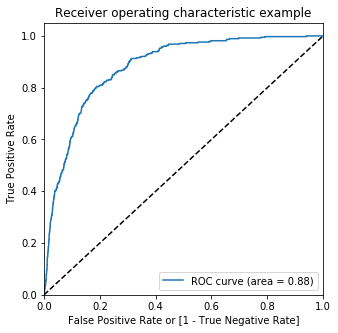

In [75]:
draw_roc(y_train_pred_final.y, y_train_pred_final.y_Prob)

In [76]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(20)

,y,y_Prob,indexnum,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.041105,2085,0,1,0,0,0,0,0,0,0,0,0
1,0,0.036594,1239,0,1,0,0,0,0,0,0,0,0,0
2,0,0.041993,130,0,1,0,0,0,0,0,0,0,0,0
3,0,0.037749,2345,0,1,0,0,0,0,0,0,0,0,0
4,0,0.138746,1296,0,1,1,0,0,0,0,0,0,0,0
5,1,0.093661,318,0,1,0,0,0,0,0,0,0,0,0
6,0,0.129439,2461,0,1,1,0,0,0,0,0,0,0,0
7,0,0.049743,1764,0,1,0,0,0,0,0,0,0,0,0
8,0,0.034258,2636,0,1,0,0,0,0,0,0,0,0,0
9,0,0.056872,2578,0,1,0,0,0,0,0,0,0,0,0


In [77]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.119785  1.000000  0.000000
0.1   0.1  0.765487  0.849604  0.754039
0.2   0.2  0.863148  0.627968  0.895153
0.3   0.3  0.882743  0.459103  0.940395
0.4   0.4  0.893489  0.343008  0.968402
0.5   0.5  0.891909  0.242744  0.980251
0.6   0.6  0.887800  0.166227  0.985996
0.7   0.7  0.884324  0.113456  0.989228
0.8   0.8  0.881795  0.068602  0.992460
0.9   0.9  0.880847  0.034301  0.996050


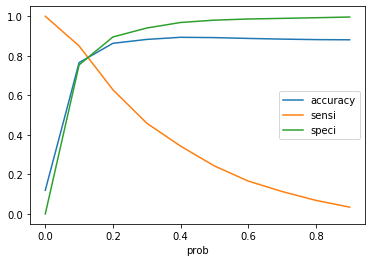

In [78]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [79]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,y,y_Prob,indexnum,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.041105,2085,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.036594,1239,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.041993,130,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.037749,2345,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.138746,1296,0,1,1,0,0,0,0,0,0,0,0,0


In [80]:
metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.final_predicted)

0.8827433628318584

In [81]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.final_predicted )
confusion2 

array([[2619,  166],
       [ 205,  174]], dtype=int64)

In [82]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [83]:
TP / float(TP+FN)

0.45910290237467016

In [84]:
TN / float(TN+FP)

0.940394973070018

In [85]:
print(FP/ float(TN+FP))

0.05960502692998205


In [86]:
print (TP / float(TP+FP))

0.5117647058823529


In [87]:
print (TN / float(TN+ FN))

0.9274079320113314


In [88]:
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
confusion

array([[2730,   55],
       [ 287,   92]], dtype=int64)

In [89]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6258503401360545

In [90]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.24274406332453827

In [91]:
from sklearn.metrics import precision_score, recall_score

In [92]:
precision_score(y_train_pred_final.y, y_train_pred_final.predicted)

0.6258503401360545

In [93]:
recall_score(y_train_pred_final.y, y_train_pred_final.predicted)

0.24274406332453827

In [94]:
from sklearn.metrics import precision_recall_curve

In [95]:
y_train_pred_final.y, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3159    0
 3160    0
 3161    0
 3162    0
 3163    0
 Name: y, Length: 3164, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3159    0
 3160    0
 3161    0
 3162    0
 3163    0
 Name: predicted, Length: 3164, dtype: int64)

In [96]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.y, y_train_pred_final.y_Prob)

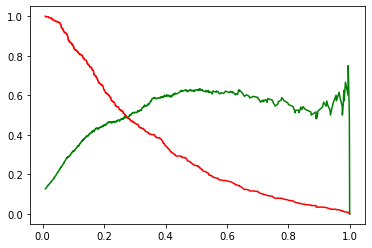

In [97]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show() #plotting the thresholds

In [98]:
X_test[['age','balance','day','duration']] = scaler.transform(X_test[['age','balance','day','duration']])

In [99]:
X_test = X_test[col]
X_test.head()

,loan,duration,entrepreneur,retired,unemployed,primary,unknown,unknown,unknown,aug,jan,jul,mar,may,nov,oct,sep
3731,0,-0.457546,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2367,0,1.326816,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
1166,0,0.202218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2973,1,1.428030,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2139,0,-0.108921,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [100]:
X_test_sm = sm.add_constant(X_test)

In [101]:
y_test_pred = res.predict(X_test_sm)

In [102]:
y_test_pred[:10]

3731    0.131835
2367    0.052705
1166    0.264113
2973    0.042505
2139    0.030007
731     0.012958
1640    0.012697
4208    0.057457
2152    0.028917
107     0.235505
dtype: float64

In [103]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [104]:
y_pred_1.head() #prediction of the top rows using head

,0
3731,0.131835
2367,0.052705
1166,0.264113
2973,0.042505
2139,0.030007


In [105]:
y_test_df = pd.DataFrame(y_test)

In [106]:
y_test_df['index_num'] = y_test_df.index

In [107]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [108]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [109]:
y_pred_final.head()

,y,index_num,0
0,0,3731,0.131835
1,0,2367,0.052705
2,1,1166,0.264113
3,1,2973,0.042505
4,0,2139,0.030007


In [110]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'y_Prob'})

In [111]:
y_pred_final.head()

,y,index_num,y_Prob
0,0,3731,0.131835
1,0,2367,0.052705
2,1,1166,0.264113
3,1,2973,0.042505
4,0,2139,0.030007


In [112]:
y_pred_final['final_predicted'] = y_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [113]:
y_pred_final.head()

,y,index_num,y_Prob,final_predicted
0,0,3731,0.131835,0
1,0,2367,0.052705,0
2,1,1166,0.264113,0
3,1,2973,0.042505,0
4,0,2139,0.030007,0


In [114]:
metrics.accuracy_score(y_pred_final.y, y_pred_final.final_predicted)

0.9034635224760501

In [115]:
confusion2 = metrics.confusion_matrix(y_pred_final.y, y_pred_final.final_predicted )
confusion2

array([[1187,   28],
       [ 103,   39]], dtype=int64)

In [116]:
TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [117]:
TP / float(TP+FN)

0.2746478873239437

In [118]:
TN / float(TN+FP)

0.9769547325102881